In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt

# Importing NumPy (Numerical Python) which is a library consisting of multidimensional array objects and a collection of routines for processing those arrays. It also gives an alias to the library.
import numpy as np

% matplotlib inline
np.random.seed(2017) 

# There are two main types of models available in Keras: the Sequential model and the Model class used with the functional API.
# Sequential model is a linear stack of layers. Importing Sequential model from Keras.
from keras.models import Sequential

# Importing different layers from Keras.
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization

# Importing the utils library of Keras.
from keras.utils import np_utils

# Importing the callbacks of Keras.
from keras.callbacks import ModelCheckpoint

from keras.preprocessing import image
import cv2
import sys
import pandas as pd

Using TensorFlow backend.


In [0]:
# CIFAR10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. Importing CIFAR10 dataset from Keras.
from keras.datasets import cifar10

# Loading the CIFAR10 60000 Training and 10000 Test data into respective numpy arrays
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()

# Setting the count, number of channels, rows and columns of training images
num_train, img_channels, img_rows, img_cols =  train_features.shape

# Setting the count of test images
num_test, _, _, _ =  test_features.shape

# Setting number of classes (10)
num_classes = len(np.unique(train_labels))

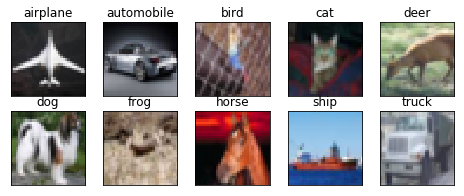

In [3]:
# Setting up the class names
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Plotting an image from each of the 10 classes
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
# Custom function to test accuracy
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
# Pixel normalization for training images
train_features = train_features.astype('float32')/255

# Pixel normalization for test images
test_features = test_features.astype('float32')/255

# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

# CHANGED MODEL


*   Reduced the number of kernels being used.
*   Reduced the Receptive Field at the last layer from 64 to 32.
*   Changed the dropout rate to 0.125 from 0.25.
*   Removed Dense layer.
*   Removed Dropout at the last layer.
*   Removed "relu" activation at the last layer.
*   Added Batch Normalization before Convolution and Activation layers.
*   Followed the increase in number of kernels and then decrease by using 1x1 and MaxPooling and then again increase type of architecture (cake pattern).









In [7]:
# Define the model
model = Sequential()
model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(32, 32, 3))) #32,32; 3
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.125))
model.add(BatchNormalization())
model.add(Convolution2D(48, 3, 3, border_mode='same',)) #32,32; 5
model.add(Activation('relu'))

model.add(BatchNormalization())
model.add(Convolution2D(32, 1, 1)) #32,32; 5
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #16,16; 10

model.add(Dropout(0.125))
model.add(BatchNormalization())
model.add(Convolution2D(48, 3, 3, border_mode='same')) #16,16; 12
model.add(Activation('relu'))

model.add(Dropout(0.125))
model.add(BatchNormalization())
model.add(Convolution2D(96, 3, 3, border_mode='same',)) #16,16; 14
model.add(Activation('relu'))

model.add(BatchNormalization())
model.add(Convolution2D(32, 1, 1)) #16,16; 14
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #8,8; 28

model.add(Dropout(0.125))
model.add(BatchNormalization())
model.add(Convolution2D(48, 3, 3, border_mode='same')) #8,8; 30
model.add(Activation('relu'))

model.add(Dropout(0.125))
model.add(BatchNormalization())
model.add(Convolution2D(96, 3, 3, border_mode='same')) #8,8; 32
model.add(Activation('relu'))

model.add(BatchNormalization())
model.add(Convolution2D(10, 1, 1)) #8,8; 32
model.add(Activation('relu'))
model.add(Convolution2D(10, 8, 8)) #1,1; 32

model.add(Flatten())
model.add(Activation('softmax'))

W0717 14:07:03.559432 140715481814912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
W0717 14:07:03.585028 140715481814912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 14:07:03.588226 140715481814912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0717 14:07:03.623501 140715481814912 deprecation_wrapper.py:119] From /usr/local/lib/python3.

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 48)        13872     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 48)        0         
__________

In [0]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

W0630 11:19:38.471606 140648195389312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [9]:
# Mounting the Google Drive to save the weights
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# Specifying the path to store the weights
filepath="/content/gdrive/My Drive/Assignment6A_Modified:{epoch:03d}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True, mode='max')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`
  del sys.path[0]
W0629 18:19:40.350204 140389892335488 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is depre

Epoch 1/100
390/390 [==============================] - 18s 45ms/step - loss: 1.5601 - acc: 0.4351 - val_loss: 2.1257 - val_acc: 0.3743

Epoch 00001: val_acc improved from -inf to 0.37430, saving model to /content/gdrive/My Drive/Assignment6A_Modified:001-val_acc:0.374.hdf5
Epoch 2/100
390/390 [==============================] - 13s 33ms/step - loss: 1.1691 - acc: 0.5799 - val_loss: 1.1242 - val_acc: 0.6050

Epoch 00002: val_acc improved from 0.37430 to 0.60500, saving model to /content/gdrive/My Drive/Assignment6A_Modified:002-val_acc:0.605.hdf5
Epoch 3/100
390/390 [==============================] - 13s 32ms/step - loss: 0.9671 - acc: 0.6561 - val_loss: 0.9878 - val_acc: 0.6527

Epoch 00003: val_acc improved from 0.60500 to 0.65270, saving model to /content/gdrive/My Drive/Assignment6A_Modified:003-val_acc:0.653.hdf5
Epoch 4/100
390/390 [==============================] - 13s 33ms/step - loss: 0.8442 - acc: 0.6991 - val_loss: 0.8307 - val_acc: 0.7068

Epoch 00004: val_acc improved from 0

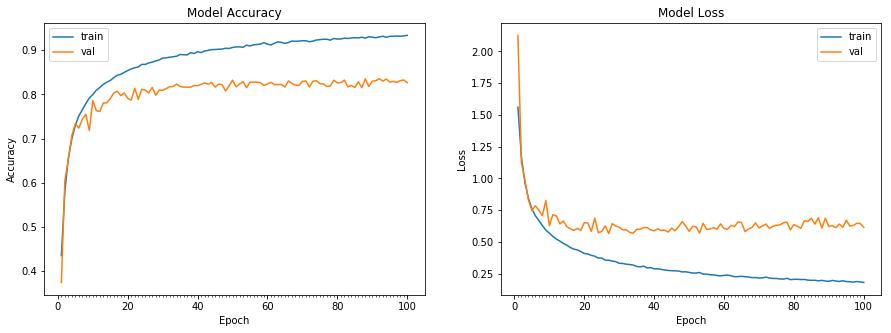

Accuracy on test data is: 82.64


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1,
                                 callbacks=[checkpoint])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# BEST ACCURACY WITH CHANGED MODEL
Epoch 92/100
390/390 [==============================] - 13s 33ms/step - loss: 0.1927 - acc: 0.9298 - val_loss: 0.6127 - **val_acc: 0.8355**

Epoch 00092: val_acc improved from 0.83510 to **0.83550**, saving model to /content/gdrive/My Drive/Assignment6A_Modified:092-val_acc:0.836.hdf5

In [0]:
#Loading the best weights for prediction
model.load_weights('/content/gdrive/My Drive/Assignment6A_Modified:092-val_acc:0.836.hdf5')

In [11]:
#Finding misclassified images
d = {'pred': model.predict_classes(test_features), 'true': np.argmax(test_labels,axis=1)} #axis=1!important!
df = pd.DataFrame(data=d)

# shows total mispredictions
df2 = df[(df.pred != df.true)]
df2

df2.shape

(1645, 2)

In [12]:
df2[0:25]

,pred,true
10,3,0
24,4,5
25,4,2
35,3,2
42,3,5
52,3,0
57,3,7
70,3,2
76,0,9
78,5,3


In [0]:
#Function to get actual class names
def getClassName(classNumber):
  for i in range(len(class_names)):
    if(classNumber == i):
      className = class_names[i]
  return className

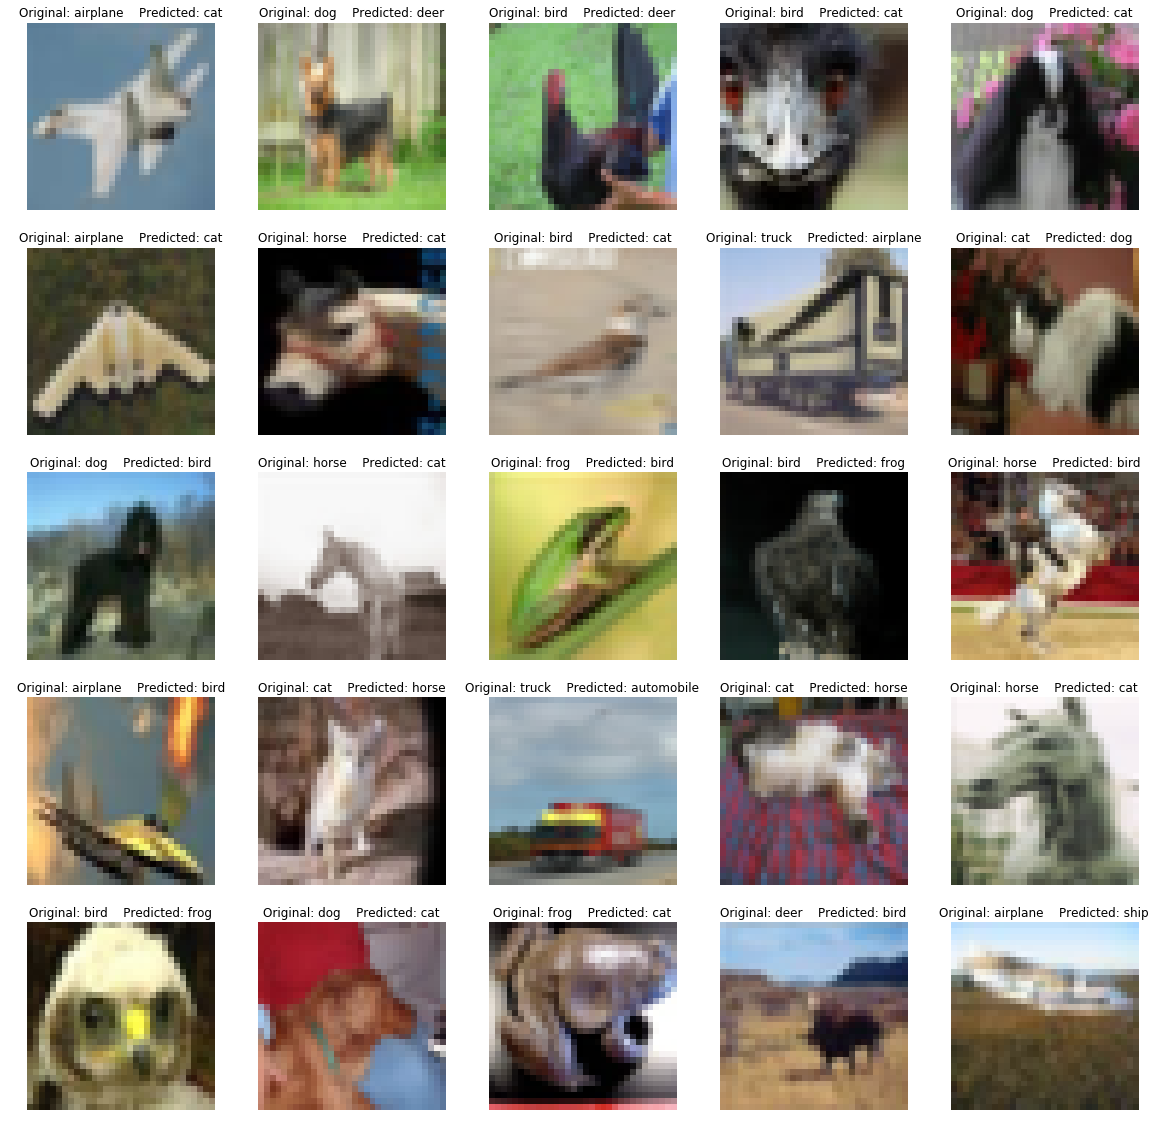

In [14]:
#Plotting 25 misclassified images
plt.figure(figsize = (20,20))

for i in range(25):
    plt.subplot(5, 5,i+1)
    img = test_features[df2.index[i]]
    img = img.reshape((32,32,3))
    plt.imshow(img, cmap='gray')
    plt.title("Original: " + getClassName(df2["true"].iloc[i])+"    Predicted: " + getClassName(df2["pred"].iloc[i]))
    plt.axis('off')
    
plt.show()

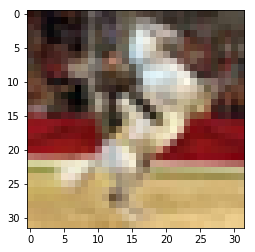

In [0]:
plt.imshow(test_features[119])

In [0]:
#Function to plot original image and GradCAM image
def plotOrigGradCam(image_number):
  (train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
  
  # Pixel normalization for test images
  test_features = test_features.astype('float32')/255

  # convert class labels to binary class labels
  test_labels = np_utils.to_categorical(test_labels, num_classes)
  
  img = test_features[image_number]
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  #x = preprocess_input(x)
  
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("activation_8")
  
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(96):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  
  (train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
  
  img = test_features[image_number]
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
  plt.title("Original: " + getClassName(test_labels[image_number])+"    Predicted: " + getClassName(class_idx))
  plt.imshow(img)
  plt.show()
  plt.imshow(superimposed_img)
  plt.show()
  cv2.waitKey(0)

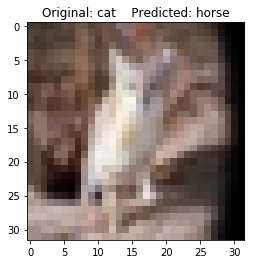

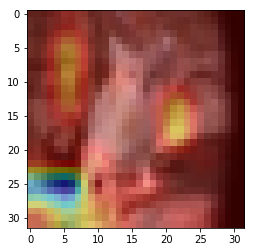

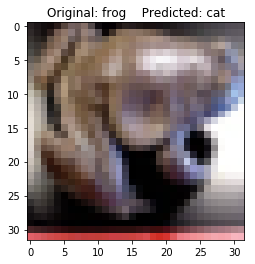

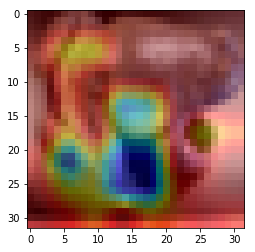

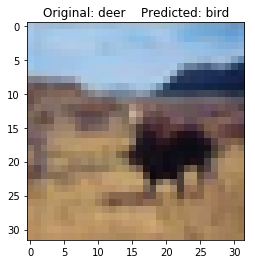

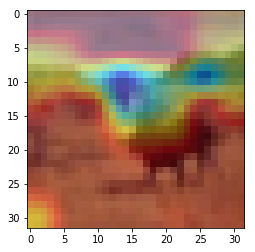

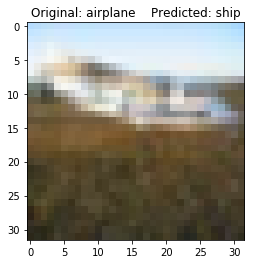

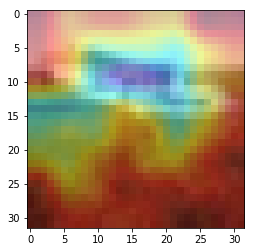

In [16]:
#Image numbers of selected images
selected_image_numbers = [127,162,165,169]

#Running a loop to plot original and GradCAM image for all the selected images
for i in range(len(selected_image_numbers)):  
  plotOrigGradCam(selected_image_numbers[i])

# INTRODUCING CUTOUT

In [0]:
# Specifying the path to store the weights
filepath="/content/gdrive/My Drive/Assignment9_Cutout:{epoch:03d}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True, mode='max')

In [0]:
!wget https://raw.githubusercontent.com/yu4u/cutout-random-erasing/master/random_eraser.py

from random_eraser import get_random_eraser

--2019-06-30 09:21:02--  https://raw.githubusercontent.com/yu4u/cutout-random-erasing/master/random_eraser.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 888 [text/plain]
Saving to: ‘random_eraser.py.2’

random_eraser.py.2  100%[===================>]     888  --.-KB/s    in 0s      

2019-06-30 09:21:02 (184 MB/s) - ‘random_eraser.py.2’ saved [888/888]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`
  
W0630 09:21:18.732418 140168414099328 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a

Epoch 1/100
390/390 [==============================] - 17s 43ms/step - loss: 1.6506 - acc: 0.3995 - val_loss: 1.5039 - val_acc: 0.4735

Epoch 00001: val_acc improved from -inf to 0.47350, saving model to /content/gdrive/My Drive/Assignment9_Cutout:001-val_acc:0.473.hdf5
Epoch 2/100
390/390 [==============================] - 13s 34ms/step - loss: 1.2698 - acc: 0.5441 - val_loss: 1.1379 - val_acc: 0.5987

Epoch 00002: val_acc improved from 0.47350 to 0.59870, saving model to /content/gdrive/My Drive/Assignment9_Cutout:002-val_acc:0.599.hdf5
Epoch 3/100
390/390 [==============================] - 13s 33ms/step - loss: 1.1030 - acc: 0.6060 - val_loss: 1.1430 - val_acc: 0.5990

Epoch 00003: val_acc improved from 0.59870 to 0.59900, saving model to /content/gdrive/My Drive/Assignment9_Cutout:003-val_acc:0.599.hdf5
Epoch 4/100
390/390 [==============================] - 13s 34ms/step - loss: 0.9834 - acc: 0.6519 - val_loss: 0.8851 - val_acc: 0.6877

Epoch 00004: val_acc improved from 0.59900 to

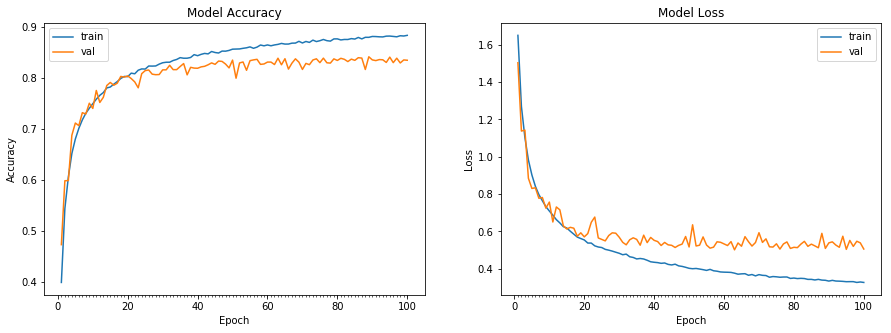

Accuracy on test data is: 83.47 with cutout


In [0]:
from keras.preprocessing.image import ImageDataGenerator

#Adding cutout as a preprocessing function
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False,
                             preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=False))


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1,
                                 callbacks=[checkpoint])
end = time.time()
print ("Model took %0.2f seconds to train with cutout"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f with cutout"%accuracy(test_features, test_labels, model))

# BEST ACCURACY WITH CHANGED MODEL
Epoch 89/100
390/390 [==============================] - 13s 33ms/step - loss: 0.3386 - acc: 0.8795 - val_loss: 0.5092 - **val_acc: 0.8415**

Epoch 00089: val_acc improved from 0.83970 to **0.84150**, saving model to /content/gdrive/My Drive/Assignment9_Cutout:089-val_acc:0.842.hdf5

In [0]:
#Loading the best weights with cutout
model.load_weights('/content/gdrive/My Drive/Assignment9_Cutout:089-val_acc:0.842.hdf5')

In [18]:
#Finding misclassifications with cutout
d_cutout = {'pred': model.predict_classes(test_features), 'true': np.argmax(test_labels,axis=1)} #axis=1!important!
df_cutout = pd.DataFrame(data=d_cutout)

# shows total mispredictions
df2_cutout = df_cutout[(df_cutout.pred != df_cutout.true)]
df2_correct = df_cutout[(df_cutout.pred == df_cutout.true)]

df2_cutout.shape

(1585, 2)

In [0]:
df2_cutout

,pred,true
24,4,5
26,2,4
33,3,5
35,9,2
37,9,1
42,7,5
57,3,7
58,3,4
59,3,6
61,5,3


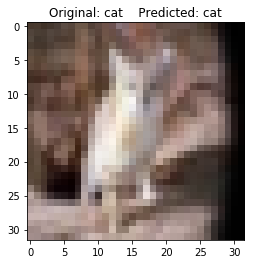

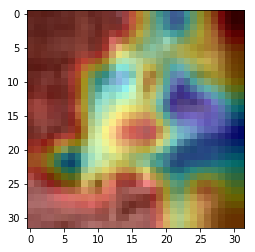

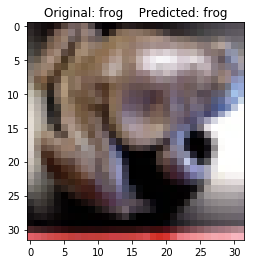

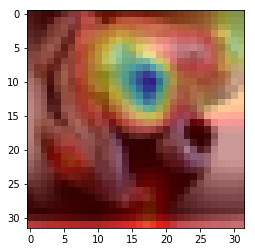

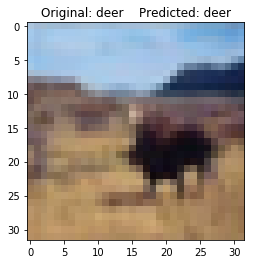

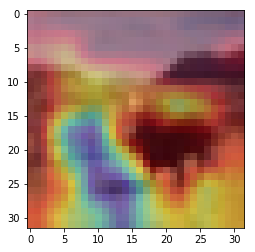

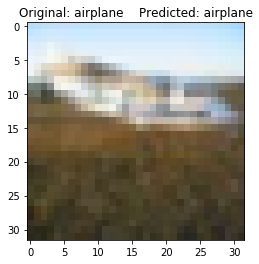

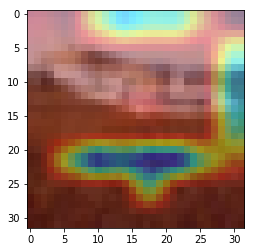

In [19]:
#Image numbers of selected images
selected_image_numbers = [127,162,165,169]

#Running a loop to plot original and GradCAM image for all the selected images
for i in range(len(selected_image_numbers)):  
  plotOrigGradCam(selected_image_numbers[i])